# Week 1 Tasks

## Forward In Time Discretization Scheme

We have the following discretization scheme:

$$y^{n+1} = y^{n} (1 - \mu \Delta t) + \Delta t f^{n}$$

We are given the initial solution:
$$y^{0} = 1$$

And the forcing function:
$$f(t) = A \cos \omega_1 t + B \cos \omega_2 t$$

As well as the global constants:

- A = 1
- B = 0.5
- $\omega_1 = 2 \pi / 5$
- $\omega_2 = 10 \pi $
- $\mu_1 = 1$
- $\mu_2 = 5$

We want the model to run for a total of 10 (time units).

We are free to vary the time steps. So we have:

- $\Delta t_1 = 0.01$
- $\Delta t_2 = 0.05$
- $\Delta t_3 = 0.1$
- $\Delta t_4 = 0.2$
- $\Delta t_4 = 0.5$


We first set up some global settings and import some libraries:

In [85]:
# import libraries
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import scienceplots # you may want to comment this line out

# set plot style
plt.style.use(['science', 'grid'])
%matplotlib widget

Then we define some constants and initial conditions:

In [86]:
# define constants and initial conditions
y_0 = 1  # the initial value of y
mu_1 = 1  # mu value for the first experiment
mu_2 = 5  # mu value for the second experiment
t_end = 10  # total time duration

Now we can define $f(t)$ as we need it in the evaluation of y at each time step:

In [87]:
def f(t):
    omega1 = (2 * pi) / 5
    omega2 = 10 * pi
    A = 1
    B = 0.5
    term1 = A * np.cos(omega1 * t)
    term2 = B * np.cos(omega2 * t)
    return term1 + term2

Then we define the Euler function that will evaluate the solution at each time step:

In [88]:
def forward_euler(mu, dt):
    num_steps = int(t_end / dt) # number of steps is important to define the array size for both the x and y values
    y_values = np.zeros(num_steps + 1) # size of array has to be num_steps + 1 because we need to include y_0, which is explicitly defined
    y_values[0] = y_0 # set the initial value of the y array to y_0

    for i in range(num_steps): # we can iterate over the number of time steps because we are starting from y_1 anyway
        t_i = i * dt # calculate the time at each step
        y_values[i + 1] = y_values[i] * (1 - mu * dt) + dt * f(t_i) # apply the discretisation scheme to calculate the next value of y

    return y_values

Now we simply run the model for each value of dt, with $\mu = 1$

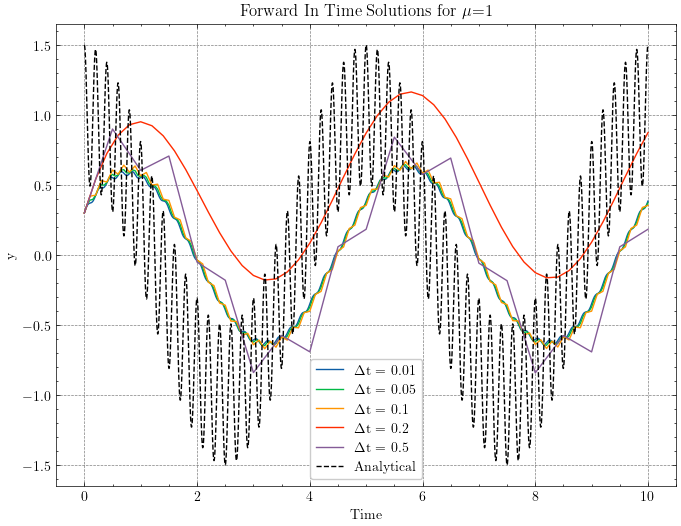

In [89]:
#array of dt values allows us to plot all solutions side by side
dt_values = [0.01, 0.05, 0.1, 0.2, 0.5]

# plot results for mu=1
plt.figure(figsize=(8, 6), dpi=100)

for dt_value in dt_values:
    t_values = np.arange(0, t_end + dt_value, dt_value) # create an array of time values equal in magnitude to the number of steps
    y_values = forward_euler(mu_1, dt_value)
    
    # plot the numerical solution
    plt.plot(t_values, y_values, label=f'$\Delta$t = {dt_value}')

# plot the analytical solution y=f(t)/mu
t_values = np.linspace(0, t_end, 5000)
analytical_solution = f(t_values) / mu_1 
plt.plot(t_values, analytical_solution, label='Analytical', linestyle='--', color='black')

plt.title(f'Forward In Time Solutions for $\mu$={mu_1}')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()

And we repeat the above but with $\mu = 5$

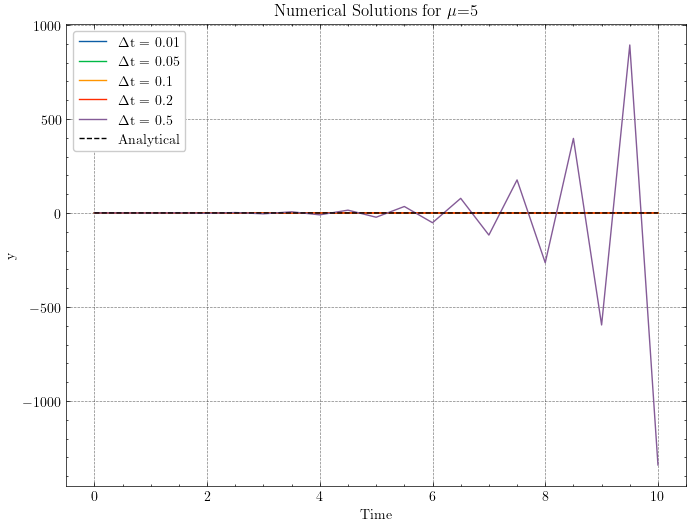

In [90]:
# plot results for mu=1
plt.figure(figsize=(8, 6), dpi=100)

for dt_value in dt_values:
    t_values = np.arange(0, t_end + dt_value, dt_value) # create an array of time values equal in magnitude to the number of steps
    y_values = forward_euler(mu_2, dt_value)

    # plot the numerical solution
    plt.plot(t_values, y_values, label=f'$\Delta$t = {dt_value}')

# plot the analytical solution y=f(t)/mu
t_values = np.linspace(0, t_end, 5000)
analytical_solution = f(t_values) / mu_2
plt.plot(t_values, analytical_solution, label='Analytical', linestyle='--', color='black')

plt.title(f'Numerical Solutions for $\mu$={mu_2}')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()


# Backward In Time Discretization Scheme

And plot the results for $\mu = 1$:

Here we simply define the backward in-time discretization scheme:

$$ y^{n+1} = \frac{y^n + \Delta t f^{n+1}}{1 + \mu \Delta t}$$

which we can code as follows:

In [91]:
def backward_euler(mu, dt):
    num_steps = int(t_end / dt) # number of steps is important to define the array size for both the x and y values
    y_values = np.zeros(num_steps + 1) # size of array has to be num_steps + 1 because we need to include y_0, which is explicitly defined
    y_values[0] = y_0 # set the initial value of the y array to y_0

    for i in range(num_steps): # we can iterate over the number of time steps because we are starting from y_1 anyway
        t_i_plus_1 = (i+1) * dt # calculate the time at each step
        y_values[i + 1] = (y_values[i] + (dt * f(t_i_plus_1))) / (1 + (mu * dt)) # apply the discretisation scheme to calculate the next value of y

    return y_values

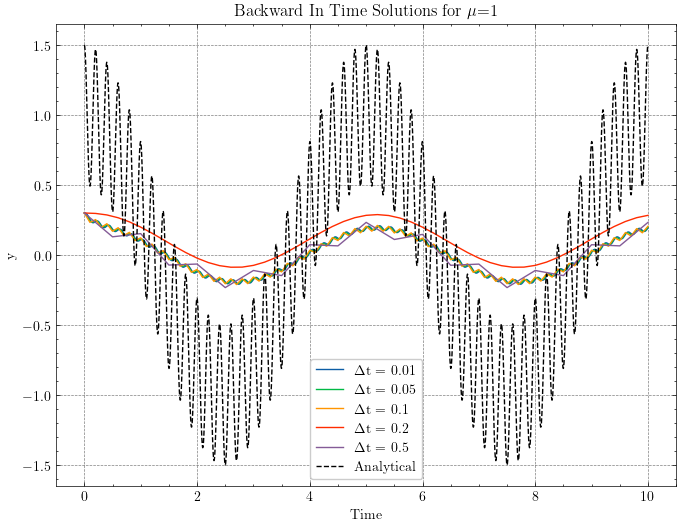

In [92]:
# plot results for mu=1
plt.figure(figsize=(8, 6), dpi=100)

for dt_value in dt_values:
    t_values = np.arange(0, t_end + dt_value, dt_value) # create an array of time values equal in magnitude to the number of steps
    y_values = backward_euler(mu_2, dt_value)

    # plot the numerical solution
    plt.plot(t_values, y_values, label=f'$\Delta$t = {dt_value}')

# plot the analytical solution y=f(t)/mu
t_values = np.linspace(0, t_end, 5000)
analytical_solution = f(t_values) / mu_1
plt.plot(t_values, analytical_solution, label='Analytical', linestyle='--', color='black')

plt.title(f'Backward In Time Solutions for $\mu$={mu_1}')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()

# Centred In Time Discretization Scheme

Here we simply define the backward in-time discretization scheme:

$$ y^{n+1} = \frac{(1 - \mu \Delta t/2)y^n + \Delta t f^{n+1/2}}{(1 + \mu \Delta t/2)}$$

In [93]:
def centred_in_time(mu, dt):
    num_steps = int(t_end / dt) # number of steps is important to define the array size for both the x and y values
    y_values = np.zeros(num_steps + 1) # size of array has to be num_steps + 1 because we need to include y_0, which is explicitly defined
    y_values[0] = y_0 # set the initial value of the y array to y_0

    for i in range(num_steps): # we can iterate over the number of time steps because we are starting from y_1 anyway
        t_i_plus_half = (i+(1/2)) * dt # calculate the time at each step
        y_values[i + 1] = (((1 - mu * dt) * y_values[i]) + (dt * f(t_i_plus_half))) / (1 + mu * (dt/2))  # apply the discretisation scheme to calculate the next value of y

    return y_values

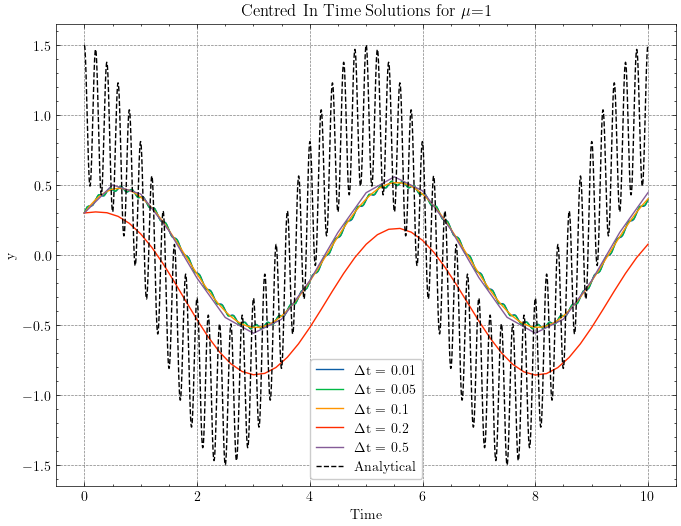

In [94]:
# plot results for mu=1
plt.figure(figsize=(8, 6), dpi=100)

for dt_value in dt_values:
    t_values = np.arange(0, t_end + dt_value, dt_value) # create an array of time values equal in magnitude to the number of steps
    y_values = centred_in_time(mu_1, dt_value)

    # plot the numerical solution
    plt.plot(t_values, y_values, label=f'$\Delta$t = {dt_value}')

# plot the analytical solution y=f(t)/mu
t_values = np.linspace(0, t_end, 5000)
analytical_solution = f(t_values) / mu_1
plt.plot(t_values, analytical_solution, label='Analytical', linestyle='--', color='black')

plt.title(f'Centred In Time Solutions for $\mu$={mu_1}')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()

# Leapfrog Scheme

Here we simply define the backward in-time discretization scheme:

$$ y^{n+1} = \frac{y^{n-1} + \Delta t f^{n+1}}{1 + \mu \Delta t}$$

In [95]:
def leapfrog(mu, dt):
    num_steps = int(t_end / dt) # number of steps is important to define the array size for both the x and y values
    y_values = np.zeros(num_steps + 1) # size of array has to be num_steps + 1 because we need to include y_0, which is explicitly defined
    y_values[0] = y_0 # set the initial value of the y array to y_0
    y_values[1] = forward_euler(mu, dt)[1] # set the second value of the y array to y_1

    for i in range(num_steps): # we can iterate over the number of time steps because we are starting from y_1 anyway
        t_i = i * dt # calculate the time at each step
        y_values[i + 1] = (y_values[i-1]) - (2 * mu * dt * y_values[i]) + (2 * dt * f(t_i)) # apply the discretisation scheme to calculate the next value of y

        # update y_values at time[0] and time[1] to calculate next time step
        y_values[i-1] = y_values[i]
        y_values[i] = y_values[i+1]
        
    return y_values

## Visualising solutions for all numerical schemes.

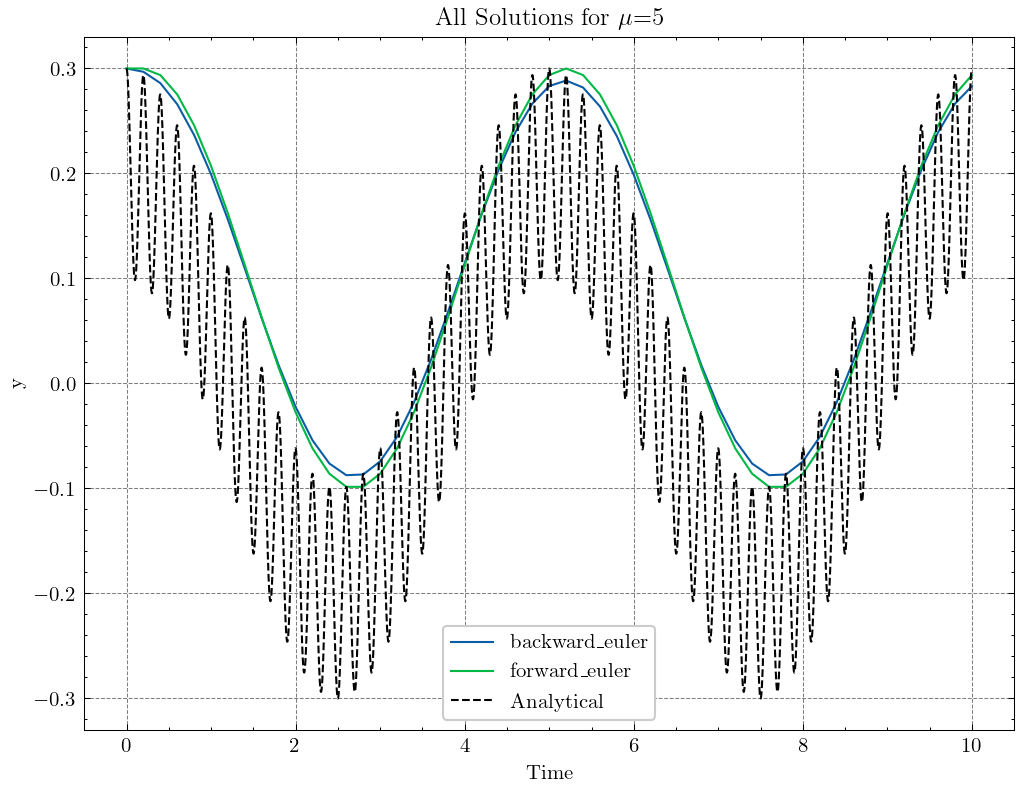

In [96]:
# plot results for mu=1
plt.figure(figsize=(8, 6), dpi=150)

dt_values = [0.2]

for dt_value in dt_values:
    t_values = np.arange(0, t_end + dt_value, dt_value) # create an array of time values equal in magnitude to the number of steps
    y_values_1 = leapfrog(mu_2, dt_value)
    y_values_2 = centred_in_time(mu_2, dt_value)
    y_values_3 = backward_euler(mu_2, dt_value)
    y_values_4 = forward_euler(mu_2, dt_value)

    # plot the numerical solution
    # plt.plot(t_values, y_values_1, label=f'leapfrog')
    # plt.plot(t_values, y_values_2, label='centred_in_time')
    plt.plot(t_values, y_values_3, label=f'backward_euler')
    plt.plot(t_values, y_values_4, label=f'forward_euler')

# plot the analytical solution y = f(t)/mu
t_values = np.linspace(0, t_end, 5000)
analytical_solution = f(t_values) / mu_2
plt.plot(t_values, analytical_solution, label='Analytical', linestyle='--', color='black')

plt.title(f'All Solutions for $\mu$={mu_2}')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()
plt.show()